# Banking Customer Propensity Modelling with Class Imballanced Data                                                                                                                                                                                                                                                                                                                                                                                  


# Introduction

A bank’s term deposit is defined as “a fixed term lump sum savings account” (Raisin, 2025). The customer locking in their deposits for a longer period of time benefits the bank in two ways: (1) Gives it more financial stability, given that it can depend on that liquidity being available for a longer time horizon; (2) Allows it to make longer-term investments in other securities (which could in-turn lead to greater returns). 

Given the importance of term deposits to a bank’s liquidity and profitability, having the right strategy and tactics in-place to optimally market and sell these term deposits is vital. Our bank spends huge budgets on marketing and sales, in order to drive these initiatives. Many of the bank’s preferred advertising channels are extremely costly (for example telephone marketing, or paid media advertising). Targeting the prospective customers most likely to purchase the financial product, and keeping ad wastage low, is of utmost importance to the bank. Modern data science and predictive analytical techniques have been adopted by many sectors, in order to help target customers more effectively. One of these techniques is known as Customer Propensity Modelling. The technique utilises machine learning classification models to predict which prospective customers are most likely to purchase a product. Then a score is given using the classifier's probability. This can then be used by the company to focus their marketing budget on only certain (high propensity) customers. 


# Background

The scope of customer predictive analytics for banking generally falls under two main areas: (1) Predicting which prospects will become customers; (2) Predicting which current customers will churn (close their bank account). 

There is a large amount of research that has been carried out around these two areas, in many sectors, including e-commerce, telecoms, and of course, finance and banking. (Chen at al., 2024) carry out a high-level systematic review of research in the area of predicting customer behaviour. The study explains that tree-based, ensemble, and feedforward neural networks (FNN) methods are commonly utilised in the area. 

(Zoynul Abedin, et al., 2023) focuses on banking customers and discusses various classification techniques, this time introducing the likes of Multi-Layer Perceptrons and Naïve Bayes. This paper focuses predominantly on feature engineering. 

(Coussement, C., Van den Poel, D., 2008) uses binary classification models to predict subscription customer churn. They focus predominantly on support vector machines, but also include outputs from Random Forest and Logistic Regression algorithms. 

This report adds to this existing body of research, but also adopts the techniques used towards Customer Propensity Modelling within the banking sector (a specific combinatory niche that doesn’t seem to be researched extensively). 

One final important comment (whilst discussing relevant work in this area) is that many Customer Relationship Management (CRM) SAAS include propensity models. These include HubSpot, SalesForce and Bloomreach. These companies utilise binary classifications to derive these scores. 


# Data

### Data Source

The data used in this report is the Bank Marketing dataset from UC Irvine Machine Learning Repository. The reduced dataset, containing 4521 customers is used, so that the more computationally demanding algorithms (such as Support Vector Machines) will run. The dataset contains customer records taken from a Portuguese banking institution. Link is provided below:

https://archive.ics.uci.edu/dataset/222/bank+marketing


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np


bank_data = pd.read_csv("Banking Dataset - Marketing Targets.csv")
bank_data.head()

### Response Variable

The column “y” is a binary field, representing whether the customer has subscribed to a term deposit. As such, this will be used as the response variable (referred to as “label” going forwards in this report). Customers who have subscribed will be referred to as “Converters”. Customers who haven’t will be referred to as “Non-Converters”.

Taking counts of the two categories in this column shows that there is an obvious class-imbalance (there are far more Non-Converters than Converters). This aspect of the data will be of huge importance throughout this report. 


In [294]:
bank_data["y"].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

### Train-Test Split

Before the data is transformed or explored in any way, it should first be split into train and test sections. This is so that the model can be trained on a certain portion of the data, and tested on unseen data at the end of the process. The model must generalise well, and perform strongly on unseen data. 

It's important that the train-test split happens right at the start of the process, so that any decisions made during the training process aren’t influenced by seeing the test data. This influence is what is known as data leakage (IBM, 2024), and can lead to overly optimistic model validation, and lead to the model performing poorly when seeing truly unseen data. 

The Random State parameter is set, to ensure reproducibility of results. The Stratify parameter is also set to True. This ensures that equal proportions of the label are in both the train and test splits. This is important, because the label suffers from class imbalance. Keeping equal proportions in both splits means that the training data will be representative of the testing data. 


In [295]:
#Train-test split should happen before we explore the data. Note that we need to split the data into the label (y) and the features to do this. 
#But they are then concatenated back together for data exploration purposes.

y = bank_data["y"]
x = bank_data[bank_data.columns.drop('y')]

#Setting up train-test split.

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=42, stratify=y, shuffle=True
    )


#Joining the x_train and y_train test data back together

train_df = pd.concat([x_train, y_train], axis=1)

### Grouping Age

Before data cleansing is performed, it is necessary to perform some Exploratory Data Analysis (EDA). It’s clear that one of the features (age) is not yet suitable for exploration, however. Rather than using age in its natural state, the decision was made to group this feature. This is so that easier insights could be drawn from each age segment. Age was grouped into decades (20s, 30s, 40s etc). 

In [296]:
#Grouping the age feature, by decades (for easier analysis)

def age_func(X1, X2, Y):
    train_df.loc[train_df['age'].between(X1,X2), 'age_bracket'] = Y
    
#This iterates through every decade between 10 and 100, and groups the customer accordingly. 
    
for i in range (10, 100, 10):
    X1 = i
    X2 = i+9
    Y = f"{i}s"
    
    age_func(X1, X2, Y)
    
train_df["age_bracket"].unique()

array(['30s', '20s', '50s', '40s', '60s', '70s', '80s', '10s'],
      dtype=object)

In [297]:
#age_bracket has grouped age correctly

train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_bracket
1244,37,entrepreneur,single,tertiary,no,1467,yes,yes,cellular,17,nov,349,1,-1,0,unknown,no,30s
3359,25,unemployed,single,secondary,no,34,no,yes,unknown,4,jul,316,1,-1,0,unknown,no,20s
2983,53,retired,married,secondary,no,1278,yes,no,telephone,15,jul,174,3,-1,0,unknown,no,50s
4279,31,housemaid,married,unknown,yes,-6,no,yes,telephone,7,jul,94,2,-1,0,unknown,no,30s
4023,43,unemployed,married,secondary,no,3529,no,no,cellular,5,feb,169,2,-1,0,unknown,no,40s


### Exploratory Data Analysis

Firstly simple descriptive statistics of the data are printed. 

In [298]:
#Printing basic descriptive statistics.

train_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,41.054678,1406.905499,16.050885,265.302149,2.798357,39.932364,0.515803
std,10.386760,2810.333965,8.222576,263.214008,3.128472,100.104153,1.490216
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,64.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,452.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,48.000000,1490.000000,21.000000,332.000000,3.000000,-1.000000,0.000000
max,87.000000,42045.000000,31.000000,3025.000000,50.000000,871.000000,22.000000


### Visualising Categorical Features

In order to glean insights around the data, the categorical features have been graphed as bar charts. Given that the objective of the model is to predict which customers will subscribe to a term deposit, this label was incorporated into these visualisations. 

First the training data was split into two groups: Customers who subscribed to the term deposit (Converters) and customers who didn’t (Non-converters). Next, a unique list was taken of every category in the feature of interest. This was then joined to counts of customers who possessed that feature trait. The reason this was done, rather than simply taking the counts, was because a count for the converters or non-converters may not contain all categories. Using a left merge however, on the unique category names, however, would preserve all categories (regardless if they’re present). 

Finally the counts were transformed into percentages. The reason for this was that counts for the positive class (converters) would be far smaller than counts for the negative class. Using percentages is far easier to see the differences. 

In order to facilitate this process, a Custom Class cat_graph was created. Then a separate instance (graph_education for example) was then created for each graph. Then the custom method .converter_split() was applied to each instance. 

In [299]:
converters = train_df[train_df["y"]=="yes"]
non_converters = train_df[train_df["y"]=="no"]

In [300]:
class cat_graph:
    def __init__(self, name_of_column):
        self.name_of_column = name_of_column
    def converter_split(self):


        #This makes counts of the two groups (converters and non-converters) per each feature used in the function.

        counts_converters = converters[self.name_of_column].value_counts().sort_values(ascending=False)
        counts_non_converters = non_converters[self.name_of_column].value_counts().sort_values(ascending=False)


        #This creates a unique list of the categories contained within the feature of interest

        feature = pd.DataFrame (train_df[self.name_of_column].unique())

        #Renames the column (with the name of the feature)

        feature = feature.rename(columns = {0 : self.name_of_column})


        #Merges the counts to the category names

        feature_merge_non_converters = feature.merge(counts_non_converters, how='left', on = self.name_of_column)

        feature_merge_final = feature_merge_non_converters.merge(counts_converters, how='left', on = self.name_of_column)


        feature_merge_final = feature_merge_final.rename(columns={"count_x": "not_converted", "count_y": "converted"})


        feature_merge_final[self.name_of_column] = feature_merge_final[self.name_of_column].str.capitalize()

        #Rather than using absolute counts, percentages are used (for easier comparison)

        feature_merge_final["not_converted_percent"] = ((feature_merge_final['not_converted'] / feature_merge_final['not_converted'].sum()) * 100).round(2)

        feature_merge_final["converted_percent"] = ((feature_merge_final['converted'] / feature_merge_final['converted'].sum()) * 100).round(2)


        #Creates the plots 

        X = feature_merge_final[self.name_of_column]
        Y_not_converted = feature_merge_final["not_converted_percent"]
        Z_converted = feature_merge_final["converted_percent"]

        X_axis = np.arange(len(X)) 

        plt.bar(X_axis - 0.2, Y_not_converted, 0.4, label = 'Not - Converted', color= "midnightblue", edgecolor= "black", linewidth=0.75) 
        plt.bar(X_axis + 0.2, Z_converted, 0.4, label = 'Converted', color= "crimson", edgecolor= "black", linewidth=0.75) 

        plt.xticks(X_axis, X) 
        plt.xlabel(self.name_of_column.title().replace("_", " ")) 
        plt.ylabel("Percentage of Customers") 
        plt.title(self.name_of_column.title().replace("_", " "))
        plt.yticks(np.arange(0, 110, step=10), fontsize=10)
        plt.xticks(fontsize=10, rotation='vertical')
        plt.legend(loc=1, prop={'size': 8}) 



In [301]:
#Creating new class instances

graph_education = cat_graph("education")

graph_age = cat_graph("age_bracket")

graph_marital = cat_graph("marital")

graph_default = cat_graph("default")

graph_housing = cat_graph("housing")

graph_loan = cat_graph("loan")


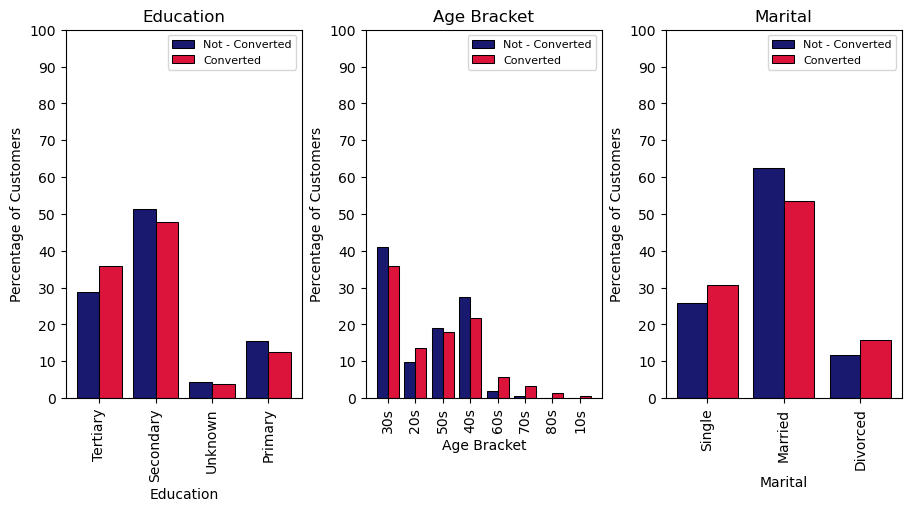

In [302]:
#This uses the method and instances created above, passes through each feature name of interest, and outputs the graphs accordingly 

import warnings
warnings.filterwarnings("ignore")


fig, axes = plt.subplots(2,1, constrained_layout=True, figsize=(9, 5))

plt.subplot(1, 3, 1)



graph_education.converter_split()



plt.subplot(1, 3, 2)



graph_age.converter_split()


plt.subplot(1, 3, 3)




graph_marital.converter_split()


plt.show()


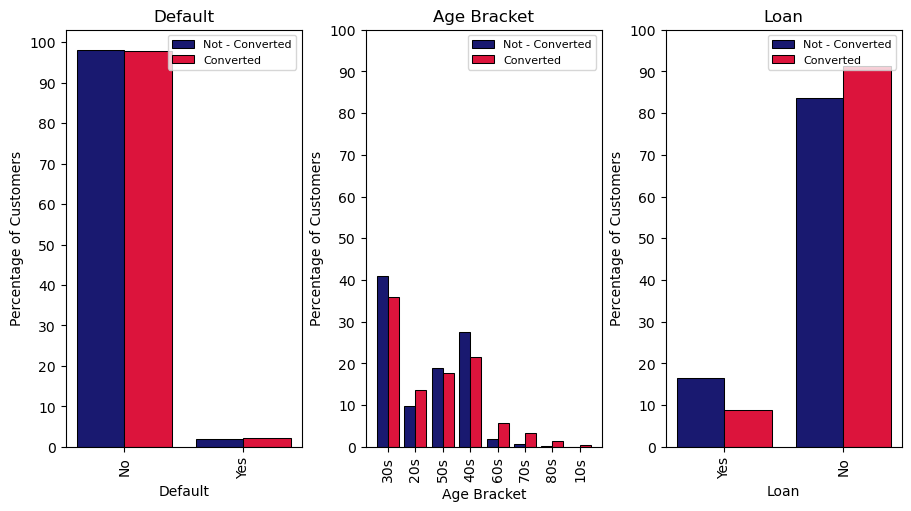

In [303]:
import warnings
warnings.filterwarnings("ignore")


fig, axes = plt.subplots(2,1, constrained_layout=True, figsize=(9, 5))

plt.subplot(1, 3, 1)


graph_default.converter_split()


plt.subplot(1, 3, 2)

graph_age.converter_split()


plt.subplot(1, 3, 3)

graph_loan.converter_split()


plt.show()



From looking at the graphs it can be seen how the Converted over or under-index with respect to the non-converters. Converters are over-indexed in tertiary jobs, in their twenties and not possessing a housing loan. Looking at the Default graph, there doesn’t seem to be any over or under-indexing on this feature. This may indicate that the Default feature will poorly predict the response variable. 

### Visualising Numerical Features

The decision was made to visualise the numerical features as histograms. 

Customer Account Balance was visualised first (a few cells below). It can clearly be seen that the distribution shows a large right skew. The 2nd graph simply zooms in on this, to demonstrate that there are indeed outlier Customer Account Balances, which go right up to 42,045 euros. 


In [304]:
#Removing the column age_bracket as we don't need it for further analysis.

train_df = train_df.drop(["age_bracket"], axis = 1)

In [305]:
#Checking the max and mins of numerical features, to check their bounds, before graphing them. 

train_df["balance"].max()

42045

In [306]:
train_df["balance"].min()

-3313

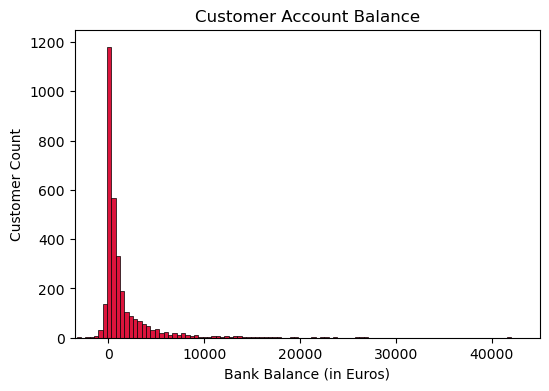

In [307]:
#Using the min and max taken above to set the bounds of the graph below.
#Note that negative ballance will be people in their overdraft. 

plt.figure(figsize=(6,4))


plt.hist(train_df["balance"], color ='crimson', bins = 100, edgecolor='black', linewidth=0.50)


plt.title("Customer Account Balance")
plt.xlabel("Bank Balance (in Euros)")
plt.ylabel("Customer Count")
plt.ylim(0, 1250)
plt.xlim(-3500, 45000)

plt.show()


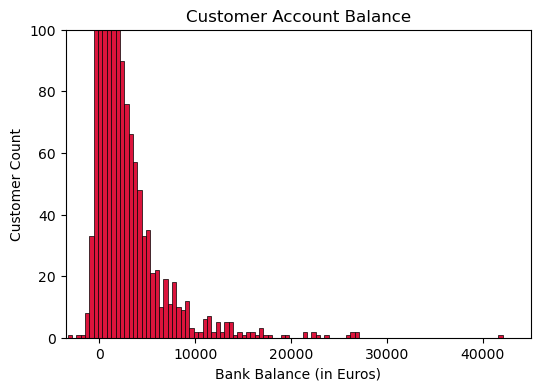

In [308]:
#Below shows (when we cut off the top of the histograms) that there are indeed observations that go up to 41K. Hard to see from the previous graph.


plt.figure(figsize=(6,4))


plt.hist(train_df["balance"], color ='crimson', bins = 100, edgecolor='black', linewidth=0.50)


plt.title("Customer Account Balance")
plt.xlabel("Bank Balance (in Euros)")
plt.ylabel("Customer Count")
plt.ylim(0, 100)
plt.xlim(-3500, 45000)

plt.show()


Graphs for Contact Duration and Contacts Performed (a few cells below), both show exponential-like distributions, again with several outliers towards the upper end of the distributions. 

In [309]:
train_df["duration"].min()

4

In [310]:
train_df["duration"].max()

3025

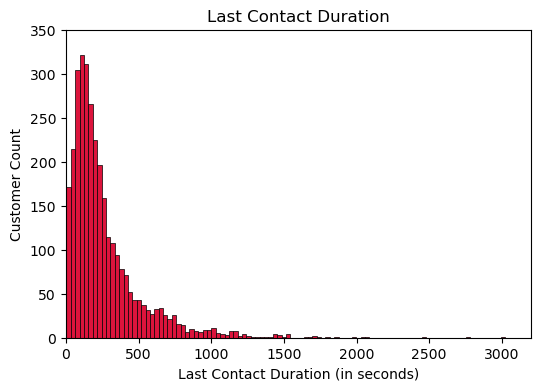

In [311]:

plt.figure(figsize=(6,4))


plt.hist(train_df["duration"], color ='crimson', bins = 100, edgecolor='black', linewidth=0.50)


plt.title("Last Contact Duration")
plt.xlabel("Last Contact Duration (in seconds)")
plt.ylabel("Customer Count")
plt.ylim(0, 350)
plt.xlim(0, 3200)

plt.show()


In [312]:
train_df["campaign"].max()

50

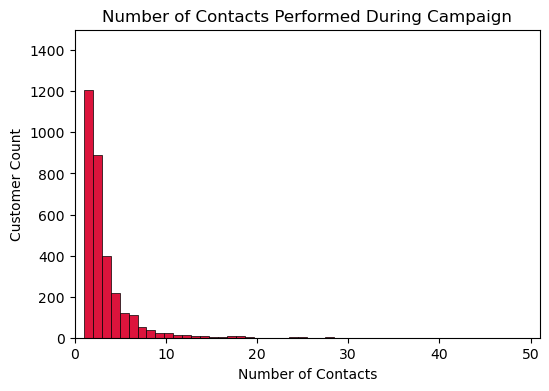

In [313]:

plt.figure(figsize=(6,4))

#This time setting bins to the exact amount of touchpoints (50)

plt.hist(train_df["campaign"], color ='crimson', bins = 50, edgecolor='black', linewidth=0.50)


plt.title("Number of Contacts Performed During Campaign")
plt.xlabel("Number of Contacts")
plt.ylabel("Customer Count")
plt.ylim(0, 1500)
plt.xlim(0, 51)

plt.show()


### Cleansing the Data for the Model

The first check made in the data cleansing process, is for null values. This returns empty, meaning we are fine to proceed, without imputing values. 


In [314]:
#Checking for null values
#No null values present in the data, so we don't need to impute values.

train_df[pd.isnull(train_df).any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y




The next action was to transform the categorical features. Most classification models can’t use categorical features in their original form. They need to be encoded into dummy variables, so that the model can interpret them correctly. 

In order to give the model better information about the features. The decision was taken to split these categorical variables into two groups: Those with natural ordinal hierarchies and those without. The ones without were handled first, and simply given dummy variables. 

The features with natural ordinal hierarchies were then OrdinalEncoded, using SKLearn Preprocessing module. 


In [315]:
from sklearn.preprocessing import OrdinalEncoder

#Using get_dummys rather than Sklearn one hot encoding. This is to specificy the columns, so that I can also add ordinal ones.


train_df_cleaned = pd.get_dummies(train_df, columns = ["job", "marital", "default", "housing", "loan", "contact", "poutcome"])


enc = OrdinalEncoder()
enc.fit(train_df[["education","month"]])
train_df_cleaned[["education_int", "month_int"]] = enc.transform(train_df[["education","month"]])

#Setting up a function to check that ordinal value are in correct orders
def ordinal_check(column, column_int):
    result = train_df_cleaned[[column, column_int]].drop_duplicates().sort_values(by=column_int)
    print (result)

Checks were then run, to ensure that the automatic ordering was correct.

In [316]:
#Checking that ordinal value are in correct orders 

ordinal_check("education", "education_int")

      education  education_int
1833    primary            0.0
3359  secondary            1.0
1244   tertiary            2.0
4279    unknown            3.0


In [317]:
#Checking that ordinal value are in correct orders 

ordinal_check("month", "month_int")

     month  month_int
2285   apr        0.0
1367   aug        1.0
3889   dec        2.0
4023   feb        3.0
158    jan        4.0
3359   jul        5.0
3306   jun        6.0
3439   mar        7.0
4174   may        8.0
1244   nov        9.0
1928   oct       10.0
855    sep       11.0


 They were not, so this was corrected with more specific code. 

In [318]:

#Due to the above encodings not being in the correct order, the following code rectifies that.

enc = OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary', 'unknown'], 
                                 ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])
enc.fit(train_df[["education", "month"]])
train_df_cleaned[["education_int", "month_int"]] = enc.transform(train_df[["education","month"]])


Based on the data exploratory analysis, certain features were removed. These were the features which were expected to have poor predictive performance on the label. Finally SKLearn’s StandardScaler method was used to standardise the features. This transformation subtracts the mean, and divides by the standard deviation:

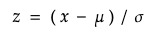

These transformations, along with the final encoding was placed inside a function for reproducibility later. 

In [319]:
#Now that we are happy with the encoding above, the below code uses those, as well as other data manipulations to clean the data for the final model trainings.
#This is all coded as a function, to allow for repreducibility later. 


def feature_clean (df):
    

    features_cleaned = pd.get_dummies(df, columns = ["job", "marital", "default", "housing", "loan", "contact", "poutcome"])


    enc = OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary', 'unknown'], 
                                     ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])
    enc.fit(df[["education", "month"]])
    features_cleaned[["education_int", "month_int"]] = enc.transform(df[["education","month"]])
    
    
    x_cleaned = features_cleaned[["education_int", "age",'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes']]
    
    #We also standardise the features

    from sklearn.preprocessing import StandardScaler

    sc = StandardScaler()
    
    x_cleaned = sc.fit_transform(x_cleaned)
    
    return x_cleaned

In [320]:
x_train_cleaned = feature_clean (train_df)

y_train_cleaned = train_df["y"]

# Methodology

### Cross-Validation 

As previously mentioned, it’s important to keep the test data unseen, until evaluation right at the end of the machine learning process. This avoids data leakage. In order to iteratively test the models throughout the training process, however, it’s important to use a process known as Cross-Validation. This project will use the particular technique K-Fold Cross-Validation. This is where the training data is split into k different sections. The model is then run on k-1 of these sections, whilst the remaining section is left as a hold-out group, and then validated on. The algorithm will then use another section as the hold-out group (before it is used to validate on). It will do this iteratively until each of the sections have been held out and used for validation. 

Rather than using the standard K-Fold method, the decision was made to use the StratifiedKFold method. This has a similar effect to the Stratify parameter for the test-train split method. It ensures that each K split has equal proportions of the label. Again, this is important, given that the data suffers from class imbalance. The random_state parameter is set to allow for reproducibility. 


In [321]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


#StratifiedKFold is used because of the class imbalance

KFS = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)


## Training the Models

### Logistic Regression - without Regularisation 

The first model that is trained is a standard logistic regression model. This model is chosen, because it works well for 2-class classification problems like this one. 
The Logistic Regression uses the following function to estimate the probability that a certain observation is <50% or  >=50%:

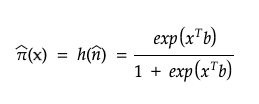

The cross_val_score function is given the scoring parameter “accuracy”. This will measure the percentage of correct predictions made. This model produces an accuracy of 88.46%. This appears strong. It should be remembered, however, that the data suffers from class imbalance. This means that there is a good chance that the model is simply learning from the Non-converters, and as a result, blindly predicting almost all customers will not convert. This will result in a large proportion of correct predictions, but a low number of predicted converters. 

To use a more robust metric, the next model uses “roc_auc” (Area Under the Receiver Operating Characteristic Curve). This is a better scoring metric for when data is imbalanced, because it can better distinguish between positive and negative classes. This shows a much reduced score of 62.20%. This more robust metric should be used going forwards however. 


In [322]:
from sklearn.linear_model import LogisticRegression

#Training the logistic regression
log_reg = LogisticRegression(penalty="none", solver = 'sag')

#Cross validation, optimised towards the "accuracy" metric

kfscore_accuracy = cross_val_score (log_reg, x_train_cleaned, y_train_cleaned, cv = KFS, scoring = "accuracy")


kfscore_accuracy


array([0.88467615, 0.88467615, 0.88467615, 0.88467615, 0.88449367])

In [323]:
#This returns accuracy, which performs pretty well. But remember that we have a large class imballance. So accuracy isn't the best metric.

np.average(kfscore_accuracy)

0.8846396504489371

In [324]:
#Instead, here we use roc_auc, which takes into account the class imballance. 

kfscore_roc_auc = cross_val_score (log_reg, x_train_cleaned, y_train_cleaned, cv = KFS, scoring = "roc_auc")

kfscore_roc_auc


array([0.60090509, 0.66585127, 0.61738014, 0.63172701, 0.59424854])

In [325]:
#This doesn't perform as well.

np.average(kfscore_roc_auc)

0.6220224077451698

### Logistic Regression - with Regularisation 


The next two models introduce regularisation (a technique where a penalty term is added to the loss function of a model). This penalty term means that the model is not only focussed on minimising the loss, but also on minimising the penalty term. This results in a model that generalises better to unseen data. The ROC-AUC results on the regularised logistic regression are shown below:

L2 Regularisation = 62.30%

L1 Regularisation = 62.12% 

The L2 Logistic Regression is so far the best model. 


In [326]:
#Testing the models with the L2 regularization parameter. Note that solver is now set to "saga". 
#This is because it's compatible with penalty L1 (which we'll test shortly). This was to keep the test consistent.
log_reg_l2 = LogisticRegression(penalty="l2", solver = 'saga', class_weight = 'balanced')

#Instead, here we use roc_auc, which takes into account the class imballance. 

kfscore_roc_auc_l2 = cross_val_score (log_reg_l2, x_train_cleaned, y_train_cleaned, cv = KFS, scoring = "roc_auc")

kfscore_roc_auc_l2

np.average(kfscore_roc_auc_l2)

0.6223543448427965

In [327]:
#Checking L1 regularisation

log_reg_l1 = LogisticRegression(penalty="l1", solver = 'saga', class_weight = 'balanced')


kfscore_roc_auc_l1 = cross_val_score (log_reg_l1, x_train_cleaned, y_train_cleaned, cv = KFS, scoring = "roc_auc")

kfscore_roc_auc_l1



array([0.60318004, 0.66183953, 0.61473826, 0.63767123, 0.59125885])

In [328]:
np.average(kfscore_roc_auc_l1)

0.6217375826626383

### Support Vector Machines

The next model that is fit is a Support Vector Machine (SVM), also known as a Support Vector Classifier (SVC) in this classification context. The model seeks to solve this optimisation problem:

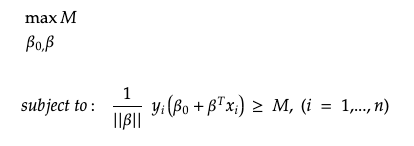

The model tries to maximise the margin (denoted by M), subject to the normalised distances from the decision boundaries, being greater than M.

The basic model is fit first, which actually returns the poorest ROC-AUC score yet of only 55.20%. 


In [329]:
#Training the Support Vector Classifier

from sklearn.svm import SVC

svc = SVC()

In [330]:
kfscore_svm_roc_auc = cross_val_score (svc, x_train_cleaned, y_train_cleaned, cv = KFS, scoring = "roc_auc")

kfscore_svm_roc_auc


array([0.5717955 , 0.59124266, 0.53748777, 0.51952055, 0.54014017])

In [331]:
np.average(kfscore_svm_roc_auc)

0.5520373299048832

### Checking for Linear Seperability

The next step is to conduct some hyperparameter tuning, in order to improve the performance of this model. The graph below demonstrates that the data isn’t linearly separable for even two features (let alone many more). This means that the linear kernel hyperparameter won’t be appropriate.  

In [332]:
#Using original (uncleaned) dataframe, for easier visualisation.

age_and_duration = bank_data[["age", "duration", "y"]]

age_and_duration["y"].value_counts()

age_and_duration.loc[age_and_duration["y"] == "yes", ["age", "duration"]]

age_and_duration.head()

,age,duration,y
0,30,79,no
1,33,220,no
2,35,185,no
3,30,199,no
4,59,226,no


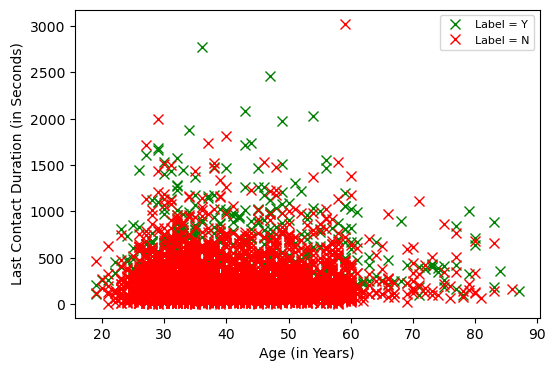

In [333]:
#Even using just 2 features, we can see that the dataset isn't linearly seperable.

plt.figure(figsize=(6, 4))

plt.plot(age_and_duration.loc[age_and_duration["y"] == "yes", ["age"]], age_and_duration.loc[age_and_duration["y"] == "yes", ["duration"]], "x", color = "green",label="Label = Y", markersize=7)
plt.plot(age_and_duration.loc[age_and_duration["y"] == "no", ["age"]], age_and_duration.loc[age_and_duration["y"] == "no", ["duration"]], "x", color = "red", label="Label = N", markersize=7)
plt.xlabel("Age (in Years)", fontsize=10)
plt.ylabel("Last Contact Duration (in Seconds)", fontsize=10)
plt.legend(loc="upper left", fontsize=14)
plt.legend(loc=1, prop={'size': 8}) 


This means that the new loss function is defined as this: 

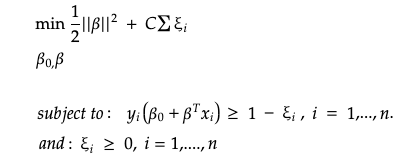

Introducing the non-negative parameter ξi means the algorithm no longer insists that every training example has margin >= 1. The C represents the balance the model makes between maximising the margin, and minimising the amount of misclassification errors.

### Tuning the SVC

In order to tune the hyperparameters of the SVC, a technique known as Grid Search is utilised. Grid Search tests every combination of hyperparameters within a given range, and finds the best combination, optimising towards a certain scoring metric (ROC-AUC in this case). Given that SVCs can have high computational complexity of between      O(n^2) and O(n^3) (with n denoting the amount of training instances), (Bottou, Lin, 2007) the decision was made to split the Grid Search up into segments (one testing the kernel and one testing C). 

In [334]:
#We can leave out linear kernel, given that the data isn't linearly seperable.
#Due to computational complexity, we are only testing one parameter at a time. 

from sklearn.model_selection import GridSearchCV

svc_params = {"kernel": ["poly", "rbf", "sigmoid"]}


grid_search = GridSearchCV(svc, param_grid=svc_params, cv=KFS, n_jobs=4, scoring = 'roc_auc')

grid_search = grid_search.fit(x_train_cleaned, y_train_cleaned)


print (grid_search.best_params_)

{'kernel': 'poly'}


Text(0, 0.5, 'ROC AUC')

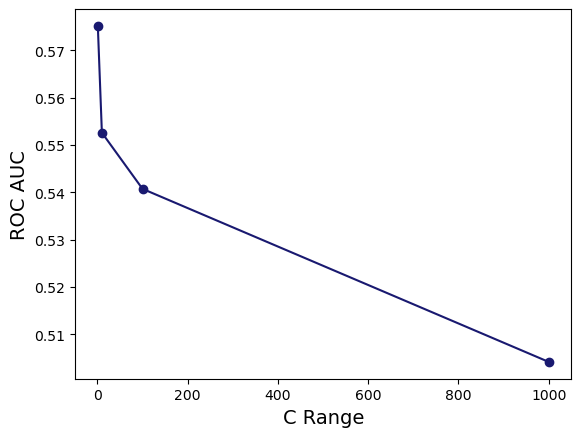

In [338]:
c_range = [1, 10, 100, 1000]

scores = []

for i in c_range:
    
 #Setting the SVC to use the poly kernel, given that it performed the best in gridsearch previously.   

    svc = SVC(C = i, kernel = "poly")

    kfscore_svm_loop_c = cross_val_score (svc, x_train_cleaned, y_train_cleaned, cv = KFS, scoring = "roc_auc")

    scores.append (np.average(kfscore_svm_loop_c))
  
plt.plot(c_range, scores, color= "midnightblue", marker="o")
plt.xlabel("C Range", fontsize=14)
plt.ylabel("ROC AUC", fontsize=14)



In [336]:
max(scores)

0.5751107521818736

Grid Search shows that the optimal Kernel is “Poly” (or Polynomial), whilst the graphs show that a C of 1 is the optimal value. These hyperparameters return a ROC-AUC score of 57.51%. 

### Gradient Boost

The final model to be tested is Gradient Boost. Gradient Boost is a popular tree-based ensemble model, which iteratively builds new models, each focussed on correcting errors made by the previous model. 

Gradient Boosting can be used as a technique to reduce a model’s bias. Given that the ROC-AUC is consistently relatively weak across folds (less than 70%), this indicates there may be a bias issue in the model, and therefore Gradient Boost is a suitable model choice. 

In [337]:
#Transforming the Label to 1 and 0, as per the GradientBoost requirements

y_train_cleaned = y_train_cleaned.replace (('yes', 'no'), (1, 0))

In [339]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb_params = {"min_samples_split": np.linspace(0.1, 0.5, 10),
             "max_depth": [3,4,5],
             "min_weight_fraction_leaf": np.linspace(0.0, 0.5, 5)
             }

grid_search_gb = GridSearchCV(gb, param_grid=gb_params, cv=KFS, n_jobs=4, scoring = "roc_auc")

grid_search_gb.fit(x_train_cleaned, y_train_cleaned)

print (grid_search_gb.best_params_)

{'max_depth': 3, 'min_samples_split': 0.4555555555555556, 'min_weight_fraction_leaf': 0.125}


In [340]:
print (grid_search_gb.best_score_)

0.6403162491379281


This time using an exhaustive Grid Search across all of the selected hyperparameters, it can be seen that the winning combination is as follows:

'max_depth': 3
'min_samples_split': 0.456
'min_weight_fraction_leaf': 0.125

This combination returns an ROC-AUC score of 64.03%, which is the strongest model yet. 

Having now found the strongest model in the Cross Validation process, the next step is to evaluate this winning model against unseen test data. 


# Results

### Testing and Evaluating the Model

Upon testing the Gradient Boost model on unseen test data, it can be seen that unfortunately, the ROC-AUC score has drastically dropped to 39.84%. This suggests that the model isn’t stable and suffers from high variance, meaning that the model is overly focussed on (and has overfit) specific patterns in the training data, and hasn’t generalised well to onsen data. One potential reason for this, may be due to model complexity. 

In [341]:
#Testing the GradientBoost model

from sklearn.metrics import classification_report, roc_auc_score
from sklearn import metrics

#Applying the same clean function to the test data 

x_test_cleaned = feature_clean(x_test)

#Predicting y_pred using the test features 

y_pred = grid_search_gb.predict(x_test_cleaned)

y_test = y_test.replace(('yes', 'no'), (1, 0))

#roc_auc requires the probability scales of the label as an input

y_prob = grid_search_gb.predict_proba(x_test_cleaned)

roc_auc_score(y_test, y_prob[:,0])


0.3984553470398599

In [342]:
np.unique(y_pred, return_counts=True)

(array([0]), array([1357]))

Looking at the Classification Report of the tested model, however, shows some valuable insights. Despite utilising best-practises to mitigate class-imbalance throughout the project, this problem has still has a huge impact on the variance of the model. Recall is the percentage of correctly identified true positives. Recall of Class 1 = 0%, meaning none were correctly identified by the model, whilst Recall of Class 0 = 100%. This means that the model has learnt from the large Non-Converter class and labelled all customers as this. 

In [343]:
print (classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1201
           1       0.00      0.00      0.00       156

    accuracy                           0.89      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.78      0.89      0.83      1357



### Finalising the Propensity Score

Using the predict_proba method returns the actual probability scale of the model. Column 1 shows the probability of the customer being in the positive class. As shown, there are no customers with > 50% probability (which concurs with the 0% Recall). Note that a classification model will classify all observations of >50% as 1, and all others as 0. 

In [344]:
#This shows that there are none of the positive class with probabilities > 50% (hence the 0% Recall) 

y_prob = grid_search_gb.predict_proba(x_test_cleaned)

y_prob = pd.Series(y_prob[:, 1])

y_prob[y_prob>0.5].count()


0

Looking at the output of predict_proba Column 1, it can be that the observations do have well varied probabilities, but all are very low. This means that by increasing the probability threshold, a suitable output can be obtained by the model, which can then be used as a customer propensity score. 

In [345]:
y_prob.head(11)

0     0.048033
1     0.197903
2     0.116577
3     0.117300
4     0.090468
5     0.212064
6     0.077530
7     0.083319
8     0.082060
9     0.036566
10    0.212301
dtype: float64

A threshold is set to < 0.85 to the predict_proba method. This returns more suitable amounts of both classes. 354 customers are now in the positive class (Converters), making up 26% of overall customers in the test data. This is appropriate, given the business’ requirement for a select list of customers.

In [346]:
#Shifting the probability threshold to 85% returns a reasonable amount of the positive class (1's). 
#Note that the code below returns the 1st column (the probability that the class = 0). 
#So we're taking the smaller proportion of those customers (which were below 85%)

y_prob_85pc = grid_search_gb.predict_proba(x_test_cleaned) < 0.85

y_prob_85pc = pd.Series(y_prob_85pc[:, 0])

y_prob_85pc[y_prob_85pc==True].count()


354

In [347]:
predict_probs_85pc = grid_search_gb.predict_proba(x_test_cleaned)

This output could be used in its current state, whilst interpreting customers >= 85% as likely to Convert. However, given that the output would be distributed to the Marketing and Sales team, interpretability is vital. For this reason, 0.35 is subtracted from the values. This normalises the scale, so that anything >= 50% can be considered as likely to convert. 


In [348]:
#This code then centers the range around 50%, for easier interbretability

predict_prob_transformed = pd.Series(predict_probs_85pc[:, 0]) - 0.35

predict_prob_transformed

0       0.601967
1       0.452097
2       0.533423
3       0.532700
4       0.559532
          ...   
1352    0.592018
1353    0.602414
1354    0.525263
1355    0.586537
1356    0.469037
Length: 1357, dtype: float64

In [349]:
#This then returns 354 customers as the predicted Converters

predict_prob_transformed[predict_prob_transformed<.50].count()

354

In [350]:
#This then returns 1003 customers as the predicted Non-Converters

predict_prob_transformed[predict_prob_transformed>0.5].count()


1003

In [351]:
#Note that we're been working with the 1st column from the probabilities (which is 1 - the 2nd column). 
#Therefore to convert this, we make the following transformation:

propensity_score_final = 1 - predict_prob_transformed

propensity_score_final[lead_score_final>.50].count()

354

In [352]:
#This then returns the final customere propensity score, which can be joined back to customer ID, and email / phone number, 
#and distributed to the relevant teams.

propensity_score_final

0       0.398033
1       0.547903
2       0.466577
3       0.467300
4       0.440468
          ...   
1352    0.407982
1353    0.397586
1354    0.474737
1355    0.413463
1356    0.530963
Length: 1357, dtype: float64

In [353]:
propensity_score_final = pd.Series(propensity_score_final)

This new output is tested using ROC-AUC, which returns a score of 60.15% (which is more in line with the validated models in the training process). This is the finalised Customer Propensity Score, which can be distributed to the Sales and Marketing teams. 

In [354]:
roc_auc_score(y_test, lead_score_final)

0.60154465296014

# Conclusion

It’s clear that class imbalance can cause numerous difficulties in the machine learning process. It’s vital to consider these ramifications across the whole machine learning pipeline. 

Despite the set-back of having poor recall in the model evaluation stage, changing the probability thresholds of the final model was a strong resolution, and gave a set of outputs which could be utilised by the bank in order to drive term deposit uptake (the initial objective). 

Another option which could be attempted in the future, would be Synthetic Minority Oversampling Technique (SMORT). This technique creates new synthetic samples of the minority class, before building a model on this partly synthesised training data. This would, of course, have to be tested alongside the threshold adjustment approach used in this report. A suitable testing approach, and success criteria would have to be established. 

In conclusion, class imbalance presents an interesting problem in the machine learning space. This report has used some of the best-practise solutions for dealing with this problem. But many more exist, which hold broad scope for further exploration. 


# References

Bottou, Lin (2007) Support Vector Machine Solvers. Taipei, Taiwan: National Taiwan University

Coussement, C., Van den Poel, D., (2008) Churn prediction in subscription services: An application of support vector machines while comparing two parameter-selection techniques, Science Direct

Abedin, Mohammad Zoynul. et al. (2023) Modelling bank customer behaviour using feature engineering and classification techniques, Science Direct

Chen, Shuixia. et al. (2024) Customer purchase prediction in B2C e-business: A systematic review and future research agenda, Science Direct

raisin.co.uk (2025) Available at:
https://www.raisin.co.uk/savings-accounts/term-deposit/ (Accessed: 1 May 2025)

ibm.com (2025) Available at:
https://www.ibm.com/think/topics/data-leakage-machine-learning (Accessed: 4 May 2025)
